# CONVOLUTIONAL NEURAL NETWORK

## 1. Import Data From Kaggle
https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! kaggle datasets download -d fedesoriano/heart-failure-prediction

  0% 0.00/8.56k [00:00<?, ?B/s]
100% 8.56k/8.56k [00:00<00:00, 8.06MB/s]


In [ ]:
! unzip heart-failure-prediction.zip

Archive:  heart-failure-prediction.zip
  inflating: heart.csv               


## 2. Data Pre-process

### 2.1 Data Exploration

In [ ]:
import pandas as pd
dataset = pd.read_csv('heart.csv')

In [ ]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Menampilkan 5 data pertama.

In [ ]:
dataset.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


Menampilkan 5 data terakhir.

In [ ]:
dataset.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

Output di atas menunjukkan bahwa terdapat 12 variable pada dataset Heart Failure Prediction

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Output di atas menunjukkan bahwa terdapat 918 (Row) data dengan total 12 variable (column), serta menunjukkan data type dari masing - masing variable.

In [ ]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Kalau dilihat secara rinci tabel di atas nilai max pada variable 'Age', 'RestingBP', 'Cholesterol', 'MaxHR' serta nilai min dari variable 'Oldpeak' sebenarnya itu terlalu tinggi dan terlalu rendah jika dibandingkan dengan variable lainnya. Maka dapat disimpulkan bahwa terdapat oulier pada dataset Heart Failure terutama di variable yang saya sebutkan tadi.

In [ ]:
dataset.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Dataset sudah tidak memiliki missing value.

### 2.2 Data Preparation

In [ ]:
# Mengubah data type
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
mydata = dataset.copy(deep = True)

mydata['Sex'] = le.fit_transform(mydata['Sex'])
mydata['ChestPainType'] = le.fit_transform(mydata['ChestPainType'])
mydata['RestingECG'] = le.fit_transform(mydata['RestingECG'])
mydata['ExerciseAngina'] = le.fit_transform(mydata['ExerciseAngina'])
mydata['ST_Slope'] = le.fit_transform(mydata['ST_Slope'])
mydata.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
5,39,1,2,120,339,0,1,170,0,0.0,2,0
6,45,0,1,130,237,0,1,170,0,0.0,2,0
7,54,1,1,110,208,0,1,142,0,0.0,2,0
8,37,1,0,140,207,0,1,130,1,1.5,1,1
9,48,0,1,120,284,0,1,120,0,0.0,2,0


Disini saya mengubah beberapa variable yang memiliki data type Categorical. Saya mengubah mereka menjadi data type tipe Numerical. Hal ini dilakukan agar memudahkan analisa selanjutnya.

In [ ]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


Dapat dilihat bahwa semua variable telah memiliki data type numerical.

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

mydata['Oldpeak'] = mms.fit_transform(mydata[['Oldpeak']])
mydata['Age'] = ss.fit_transform(mydata[['Age']])
mydata['RestingBP'] = ss.fit_transform(mydata[['RestingBP']])
mydata['Cholesterol'] = ss.fit_transform(mydata[['Cholesterol']])
mydata['MaxHR'] = ss.fit_transform(mydata[['MaxHR']])

Code di atas untuk menghandle masalah outlier (seperti yang telah saya singgung sebelumnya). Disini dilakukan Normalization serta Standardization untuk beberapa variable yang memiliki outlier.

In [ ]:
mydata.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,9.180000e+02,918.000000,918.000000,9.180000e+02,918.000000,918.000000,918.000000,9.180000e+02,918.000000,918.000000,918.000000,918.000000
mean,-1.083616e-16,0.789760,0.781046,1.954380e-16,0.000000,0.233115,0.989107,4.953675e-16,0.404139,0.396291,1.361656,0.553377
std,1.000545e+00,0.407701,0.956519,1.000545e+00,1.000545,0.423046,0.631671,1.000545e+00,0.490992,0.121201,0.607056,0.497414
min,-2.706015e+00,0.000000,0.000000,-7.154995e+00,-1.818435,0.000000,0.000000,-3.018469e+00,0.000000,0.000000,0.000000,0.000000
25%,-6.906294e-01,1.000000,0.000000,-6.699346e-01,-0.233704,0.000000,1.000000,-6.605778e-01,0.000000,0.295455,1.000000,0.000000
50%,5.188098e-02,1.000000,0.000000,-1.295128e-01,0.221363,0.000000,1.000000,4.678968e-02,0.000000,0.363636,1.000000,1.000000
75%,6.883185e-01,1.000000,2.000000,4.109089e-01,0.623835,0.000000,1.000000,7.541571e-01,1.000000,0.465909,2.000000,1.000000
max,2.491558e+00,1.000000,3.000000,3.653439e+00,3.697252,1.000000,2.000000,2.561874e+00,1.000000,1.000000,2.000000,1.000000


Variable 'Oldpeak', 'Age', 'RestingBP', 'Cholesterol', 'MaxHR' di normalisasi dan di standarisasi.

### 2.3 Data Visualization

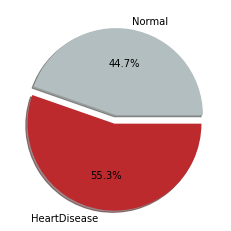

In [ ]:
import matplotlib.pyplot as plt
pie_df=pd.DataFrame(mydata.groupby('HeartDisease')['HeartDisease'].count())
pie_df

colors = ['#B2BEBF','#BD2A2E']
plt.pie(pie_df['HeartDisease'],labels=['Normal','HeartDisease'],
        autopct='%.1f%%',colors=colors,radius=1,explode = (0, 0.1),shadow=True)
plt.show()

Visualisasi di atas hanya menunjukkan persentase antara orang yang 'Normal' dengan orang yang terkena 'Heart Disease'.

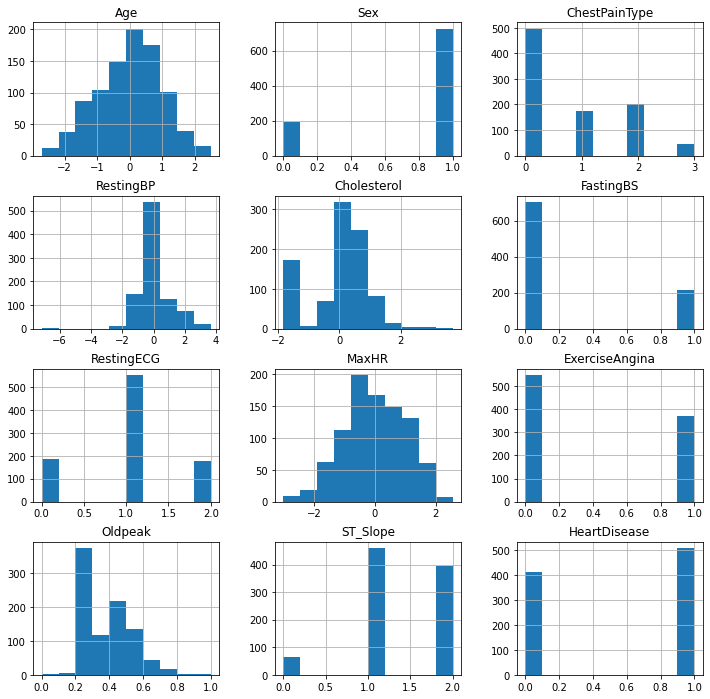

In [ ]:
mydata.hist(figsize = (12, 12))
plt.show()

Distribusi data setiap variable.

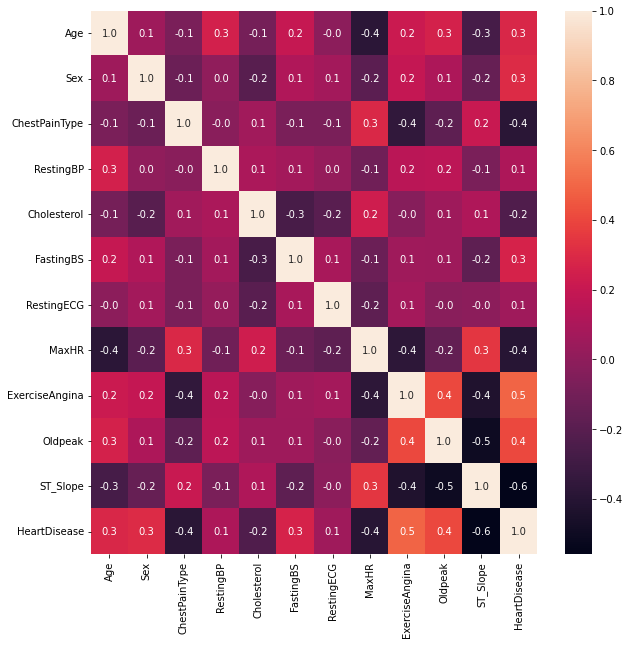

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(mydata.corr(),annot=True,fmt='.1f')
plt.show()

Correlation Heatmap digunakan untuk memvisualisasikan korelasi koefisien antara dua variable. Semakin gelap warnanya (menuju hitam) maka semakin rendah korelasi koefisien yang terjadi, begitupun sebaliknya yaitu semakin terang warnanya (menuju putih) maka korelasi koefisien yang terjadi akan semakin kuat.


### 3. Model
Disini Saya menggunakan PyTorch.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

import numpy as np

In [ ]:
from torch.utils.data import Dataset

class HeartDataset(Dataset):
  def __init__(self, X, y): #Untuk membedakan mana yang fitur dan mana yang label
    self.X = X #feature data
    self.y = y #class

  def __getitem__(self, index):
    X = torch.Tensor(self.X[index]) #tensor
    y = torch.LongTensor(self.y[index, None]) #long tensor (karena y berbentuk categorical)

    return X, y

  def __len__(self):
    return len(self.X)

Membuat sebuah class Dataset baru, hal ini dilakukan karena data dalam bentuk tabular. Nah karena data tabular itu gk bisa langsung pakai pyTorch maka nantinya data tersebut akan di ubah ke Tensor agar bisa dipakai oleh pyTorch.

In [ ]:
X = mydata[mydata.columns[0:10]].values
y = mydata.HeartDisease.values.astype(np.int64)

Disini saya menjadikan column 0 sampai koloumn 10 menjadi variable X (Independent) sedangkan untuk variable y, Saya menggunakan variable HeartDisease (Dependent)

### 3.1 Split Dataset

In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

test_X, valid_X, test_y, valid_y = train_test_split(test_X, test_y,
                                                      test_size=0.5)

from torch.utils.data import DataLoader

train_ds = HeartDataset(train_X, train_y) #ngeload dataset kita
train_loader = DataLoader(train_ds, batch_size=20,
                             shuffle=True, num_workers=0)

valid_ds = HeartDataset(valid_X, valid_y)
valid_loader = DataLoader(valid_ds, batch_size=20,
                             shuffle=False, num_workers=0)

test_ds = HeartDataset(test_X, test_y)
test_loader = DataLoader(test_ds, batch_size=20,
                            shuffle=False, num_workers=0)

Split dataset yang diminta yaitu 80% train, 10% test dan 10% validation. Untuk batch_size saya bagi menjadi 20 bagian serta data yang di training harus di shuffle agar datanya acak.
DataLoader -> itu seperti sebuah kotak yang nantinya akan dijalankan pas di modeling.

### 3.2 Model Arsitektur

In [ ]:
class Net(nn.Module):
    # define nn
    def __init__(self):
        super(Net, self).__init__()
        #input layer
        self.fc1 = nn.Linear(10, 50) #input features(brp byk variable dlm data), (Jumlah neuron di dlm hidden layer)output feature
        self.bn1 = nn.BatchNorm1d(50)
        #hidden layer
        self.fc2 = nn.Linear(50, 100) # Neuron sebelumnya, 2 * neuron sebelumnya
        self.bn2 = nn.BatchNorm1d(100)
        #output layer
        self.fc3 = nn.Linear(100,2) #Neuron sebelumnya, class


    def forward(self, X):
        X = self.fc1(X)
        X = F.relu(X)
        X = self.bn1(X)
        X = self.fc2(X)
        X = F.relu(X)
        X = self.bn2(X)
        X = self.fc3(X)

        return X

In [ ]:
# Instantiating the model
net = Net()

# Choosing the loss function
criterion = nn.CrossEntropyLoss() #kelas lebih dari 2

# Choosing the optimizer
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

# alternatif optimizer: Adam
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 100

train_mean_losses = []
valid_mean_losses = []

valid_best_loss = np.inf

for i in range(epochs):
    #===============================================================
    # training
    train_losses = []

    print("=========================================================")
    print("Epoch {}".format(i))

    for iteration, batch_data in enumerate(train_loader): #iteartion -> Berapa kali dijalankan (misalnya batch size 20) maka iteration yang terjadi 918/20
        X_batch, y_batch = batch_data

        optimizer.zero_grad() # Untuk kasih tau semua gradient bernilai 0

        out = net(X_batch)
        loss = criterion(out, y_batch.squeeze())

        loss.backward()
        optimizer.step()

        train_losses.append(loss)

    train_mean_loss = torch.mean(torch.stack(train_losses))
    print('training loss: {:10.8f}'.format(train_mean_loss))

    train_mean_losses.append(train_mean_loss)

    #===============================================================
    # validation
    valid_losses = []
    with torch.set_grad_enabled(False):
        for iteration, batch_data in enumerate(valid_loader):
            X_batch, y_batch = batch_data

            out = net(X_batch)
            loss = criterion(out, y_batch.squeeze())
            valid_losses.append(loss)

        valid_mean_loss = torch.mean(torch.stack(valid_losses))
        print('validation loss: {:10.8f}'.format(valid_mean_loss))

        valid_mean_losses.append(valid_mean_loss)

        if valid_mean_loss.cpu().numpy()[()] < valid_best_loss:
            valid_best_loss = valid_mean_loss
            torch.save(net.state_dict(), "best_model.pth")
            best_epoch = i
    #===============================================================

Epoch 0
training loss: 0.61427319
validation loss: 0.52396864
Epoch 1
training loss: 0.50692874
validation loss: 0.49937257
Epoch 2
training loss: 0.46724129
validation loss: 0.49084148
Epoch 3
training loss: 0.44448406
validation loss: 0.45641679
Epoch 4
training loss: 0.44733649
validation loss: 0.47177640
Epoch 5
training loss: 0.41495597
validation loss: 0.46801835
Epoch 6
training loss: 0.42729422
validation loss: 0.46080750
Epoch 7
training loss: 0.40347236
validation loss: 0.45723471
Epoch 8
training loss: 0.38280889
validation loss: 0.46434799
Epoch 9
training loss: 0.39204499
validation loss: 0.46850652
Epoch 10
training loss: 0.39086094
validation loss: 0.45485884
Epoch 11
training loss: 0.37535277
validation loss: 0.46276489
Epoch 12
training loss: 0.36598551
validation loss: 0.44982415
Epoch 13
training loss: 0.35852829
validation loss: 0.45173162
Epoch 14
training loss: 0.34610111
validation loss: 0.44611877
Epoch 15
training loss: 0.33968678
validation loss: 0.46081647
Ep

In [ ]:
test_predictions = np.empty((0,2))
with torch.no_grad():
    for iteration, batch_data in enumerate(test_loader):
        X_batch, y_batch = batch_data
        out = net(X_batch)

        test_predictions = np.append(test_predictions, out.numpy(),
                                     axis=0)


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

test_predictions = np.array(test_predictions)
test_predictions = np.argmax(np.array(test_predictions), axis=1)

print("=========================================================\n")
print("Predicted Class:")
print(test_predictions)
print("\nGround Truth:")
print(test_y)

print("\n=========================================================\n")
print("Confusion Matrix:")
print(confusion_matrix(test_y, test_predictions))

print("\n=========================================================\n")
accuracy = accuracy_score(test_y, test_predictions)
print("Accuracy: {}".format(accuracy))

f1 = f1_score(test_y, test_predictions, average='macro')
print("F1 Score: ", f1)

print("\n=========================================================\n")
print("Classification Report:")
print(classification_report(test_y, test_predictions))



Predicted Class:
[0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0
 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1]

Ground Truth:
[0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0
 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1
 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1 0 1]


Confusion Matrix:
[[29 12]
 [ 9 42]]


Accuracy: 0.7717391304347826
F1 Score:  0.7670886075949366


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.71      0.73        41
           1       0.78      0.82      0.80        51

    accuracy                           0.77        92
   macro avg       0.77      0.77      0.77        92
weighted avg       0.77      0.77      0.77        92



### 3.2 Model Architecture 2

In [ ]:
class Net(nn.Module):
    # define nn
    def __init__(self):
        super(Net, self).__init__()
        #input layer
        self.fc1 = nn.Linear(10, 300) #input features(brp byk variable dlm data), (Jumlah neuron di dlm hidden layer)output feature
        self.bn1 = nn.BatchNorm1d(300)
        #hidden layer
        self.fc2 = nn.Linear(300, 600) # Neuron sebelumnya, 2 * neuron sebelumnya
        self.bn2 = nn.BatchNorm1d(600)
        #output layer
        self.fc3 = nn.Linear(600,2) #Neuron sebelumnya, class


    def forward(self, X):
        X = self.fc1(X)
        X = F.relu(X)
        X = self.bn1(X)
        X = self.fc2(X)
        X = F.relu(X)
        X = self.bn2(X)
        X = self.fc3(X)

        return X

In [ ]:
# Instantiating the model
net = Net()

# Choosing the loss function
criterion = nn.CrossEntropyLoss() #kelas lebih dari 2

# Choosing the optimizer
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

# alternatif optimizer: Adam
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 100

train_mean_losses = []
valid_mean_losses = []

valid_best_loss = np.inf

for i in range(epochs):
    #===============================================================
    # training
    train_losses = []

    print("=========================================================")
    print("Epoch {}".format(i))

    for iteration, batch_data in enumerate(train_loader): #iteartion -> Berapa kali dijalankan (misalnya batch size 20) maka iteration yang terjadi 918/20
        X_batch, y_batch = batch_data

        optimizer.zero_grad() # Untuk kasih tau semua gradient bernilai 0

        out = net(X_batch)
        loss = criterion(out, y_batch.squeeze())

        loss.backward()
        optimizer.step()

        train_losses.append(loss)

    train_mean_loss = torch.mean(torch.stack(train_losses))
    print('training loss: {:10.8f}'.format(train_mean_loss))

    train_mean_losses.append(train_mean_loss)

    #===============================================================
    # validation
    valid_losses = []
    with torch.set_grad_enabled(False):
        for iteration, batch_data in enumerate(valid_loader):
            X_batch, y_batch = batch_data

            out = net(X_batch)
            loss = criterion(out, y_batch.squeeze())
            valid_losses.append(loss)

        valid_mean_loss = torch.mean(torch.stack(valid_losses))
        print('validation loss: {:10.8f}'.format(valid_mean_loss))

        valid_mean_losses.append(valid_mean_loss)

        if valid_mean_loss.cpu().numpy()[()] < valid_best_loss:
            valid_best_loss = valid_mean_loss
            torch.save(net.state_dict(), "best_model.pth")
            best_epoch = i
    #===============================================================

Epoch 0
training loss: 0.51746500
validation loss: 0.43857545
Epoch 1
training loss: 0.41698778
validation loss: 0.47559017
Epoch 2
training loss: 0.40001065
validation loss: 0.47383863
Epoch 3
training loss: 0.37036994
validation loss: 0.47283512
Epoch 4
training loss: 0.35529876
validation loss: 0.52365363
Epoch 5
training loss: 0.35673100
validation loss: 0.48657078
Epoch 6
training loss: 0.35208991
validation loss: 0.53356171
Epoch 7
training loss: 0.32420149
validation loss: 0.48047942
Epoch 8
training loss: 0.30700332
validation loss: 0.51358467
Epoch 9
training loss: 0.30377847
validation loss: 0.52083105
Epoch 10
training loss: 0.28533396
validation loss: 0.53175431
Epoch 11
training loss: 0.27898684
validation loss: 0.57064348
Epoch 12
training loss: 0.27826527
validation loss: 0.53605127
Epoch 13
training loss: 0.27307484
validation loss: 0.51503354
Epoch 14
training loss: 0.26866519
validation loss: 0.47064286
Epoch 15
training loss: 0.27119651
validation loss: 0.61465800
Ep

In [ ]:
test_predictions = np.empty((0,2))
with torch.no_grad():
    for iteration, batch_data in enumerate(test_loader):
        X_batch, y_batch = batch_data
        out = net(X_batch)

        test_predictions = np.append(test_predictions, out.numpy(),
                                     axis=0)


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

test_predictions = np.array(test_predictions)
test_predictions = np.argmax(np.array(test_predictions), axis=1)

print("=========================================================\n")
print("Predicted Class:")
print(test_predictions)
print("\nGround Truth:")
print(test_y)

print("\n=========================================================\n")
print("Confusion Matrix:")
print(confusion_matrix(test_y, test_predictions))

print("\n=========================================================\n")
accuracy = accuracy_score(test_y, test_predictions)
print("Accuracy: {}".format(accuracy))

f1 = f1_score(test_y, test_predictions, average='macro')
print("F1 Score: ", f1)

print("\n=========================================================\n")
print("Classification Report:")
print(classification_report(test_y, test_predictions))



Predicted Class:
[0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0
 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1]

Ground Truth:
[0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0
 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1
 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1 0 1]


Confusion Matrix:
[[29 12]
 [13 38]]


Accuracy: 0.7282608695652174
F1 Score:  0.725635214123822


Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.71      0.70        41
           1       0.76      0.75      0.75        51

    accuracy                           0.73        92
   macro avg       0.73      0.73      0.73        92
weighted avg       0.73      0.73      0.73        92



Dapat dilihat bahwa Model Arsitektur 2 memiliki Accuracy yang sedikit lebih buruk daripada Model Arsitektur 1. Untuk Arsitektur 2 Saya hanya menaikkan jumlah neuron yang ada menjadi 300 (Saya hanya coba - coba/) sehingga dapat disimpulkan bahwa semakin banyak jumlah neuron itu tidak berpengaruh pada accuracy.